In [76]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import zipfile

In [4]:
training_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
training_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [12]:
y_train = training_mush['class']

In [14]:
X_train = training_mush.iloc[:,:-1]

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, n_estimators=15, random_state=0)
parametrs = {'n_estimators': list(range(10,51,10)), 
             'max_depth': list(range(1,12,2)), 
             'min_samples_leaf': list(range(1,8)),
             'min_samples_split': list(range(2,10,2))
            }
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, n_jobs=-1, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [37]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15, random_state=0)

In [46]:
feature_importance = clf_rf.feature_importances_

In [47]:
feature_importance_df = pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importance})

In [48]:
feature_importance_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.192683
8,gill-color,0.113361
7,gill-size,0.101832
3,bruises,0.083312
20,population,0.082870
10,stalk-root,0.069855
6,gill-spacing,0.059865
12,stalk-surface-below-ring,0.059219
19,spore-print-color,0.055209
18,ring-type,0.049813


In [49]:
testing_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
testing_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [51]:
y_pred = clf_rf.predict(testing_mush)

In [65]:
pd.Series(y_pred).value_counts()

0    1071
1     960
dtype: int64

In [67]:
y_pred = grid_search_cv_clf.predict(testing_mush)

In [68]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [82]:
y_true = pd.read_csv('testing_y_mush.csv')
y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


<AxesSubplot:>

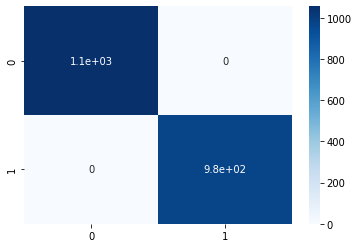

In [83]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")